In [2]:
import numpy as np

from corenn.ebm import RBM, DBN, cdk
from corenn.utils import sigmoid, chunks, tiles

Load MNIST dataset

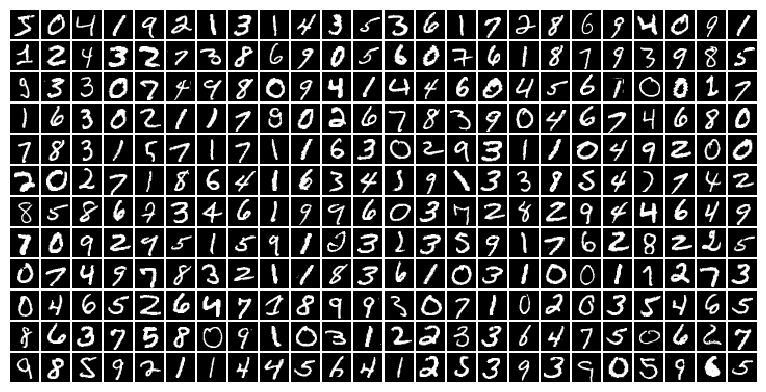

In [3]:
from mnists import MNIST

mnist = MNIST()
digits = mnist.train_images()
digits = digits[: 12 * 24]
digits = digits.reshape(-1, 24, 28, 28)
tiles(digits)

In [4]:
X_train = MNIST().train_images().astype(np.float32) / 255.0
X_train = X_train.reshape(-1, 28 * 28)
np.random.shuffle(X_train)

size = 20_000
X_train = X_train[:size, ...]

Define DBN model

In [5]:
params = {
    "pc_size": None,
    "v_activation": sigmoid,
    "h_activation": sigmoid,
    "lr": 0.1,
    "momentum": 0.5,
    "l1_penalty": None,
    "l2_penalty": None,
    "weight_limit": None,
    "init_method": "Xavier",
}

dbn = DBN(
    RBM(vsize=784, hsize=200, **params),
    RBM(vsize=200, hsize=200, **params),
    RBM(vsize=200, hsize=200, **params),
)

Run greedy layer-wise training

In [6]:
from tqdm import trange

batch_size = 128
num_epochs = 50

dbn.reset()

for layer_idx, rbm in enumerate(dbn.layers):
    print(f"Layer {layer_idx}")
    
    for epoch in trange(num_epochs):
        for X_batch in chunks(X_train, size=batch_size):
            X_batch = dbn.propagate_up(X_batch, layer_idx)
            cdk(rbm, X_batch, k=5)

Layer 0


100%|██████████| 50/50 [01:32<00:00,  1.86s/it]


Layer 1


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


Layer 2


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


Sample some digits from the DBN

Sampling: 100%|██████████| 200/200 [00:00<00:00, 846.75it/s]


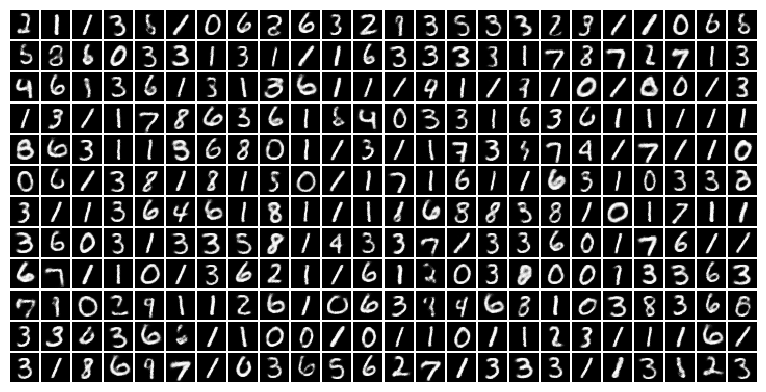

In [7]:
noise = np.random.random(size=(12 * 24, 28 * 28))
samples = dbn.sample(noise, steps=200, verbose=True)
tiles(samples.reshape(12, 24, 28, 28))